In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing , Holt , ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf 

In [9]:
df = pd.read_csv('../Datasets/airline_passengers (5).csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'

<Axes: xlabel='Month'>

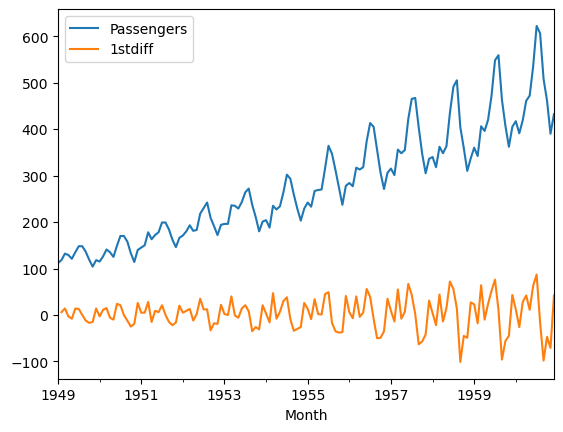

In [10]:
df['1stdiff'] = df['Passengers'].diff()
df.plot()

<Axes: xlabel='Month'>

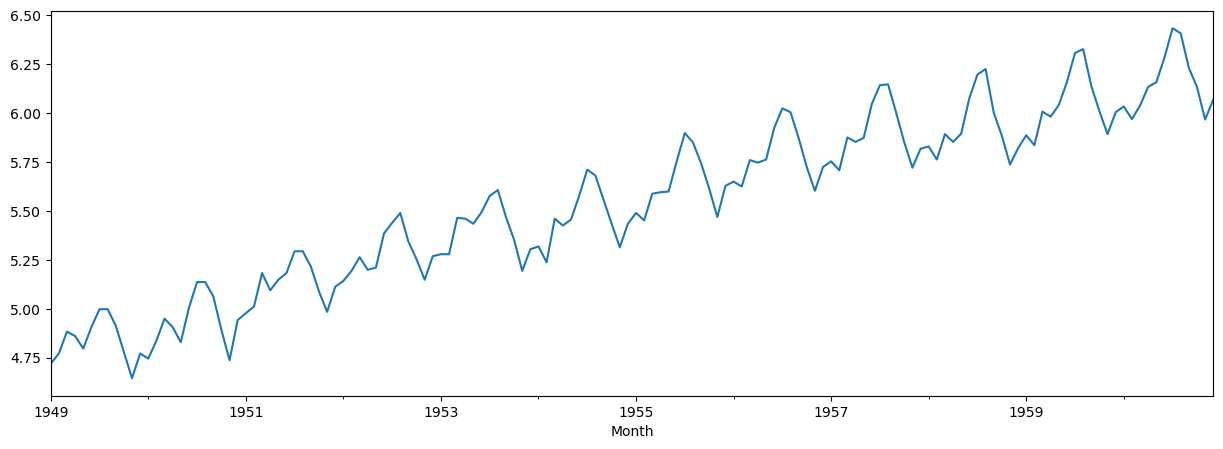

In [11]:
df['LogPassengers'] = np.log(df['Passengers'])
df['LogPassengers'].plot(figsize=(15,5))

<Axes: xlabel='Month'>

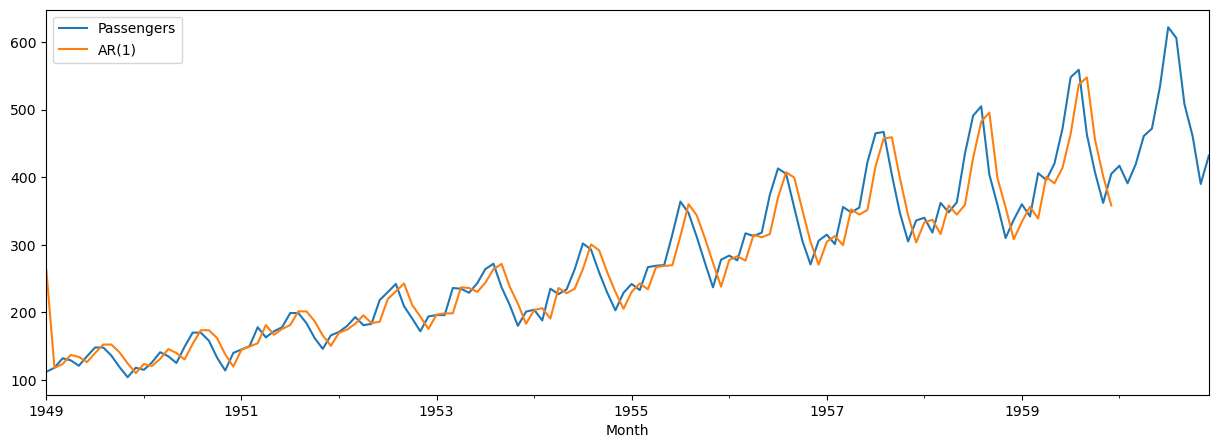

In [12]:
Ntest =  12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

arima = ARIMA(train['Passengers'],order=(1,0,0))    ## AR(1)
arima_result = arima.fit()

df.loc[train_idx , 'AR(1)'] = arima_result.predict(
       start = train.index[0] , end=train.index[-1]
)

df[['Passengers','AR(1)']].plot(figsize=(15,5))




In [15]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx,'AR(1)'] = forecast 

### confidence interval
prediction_result.conf_int()

,lower Passengers,upper Passengers
1960-01-01,338.658210,460.451500
1960-02-01,309.826171,478.809354
1960-03-01,287.732168,490.829379
1960-04-01,269.338256,499.534230
1960-05-01,253.432284,506.121347
1960-06-01,239.373402,511.217437
1960-07-01,226.768868,515.201638
1960-08-01,215.354570,518.324977
1960-09-01,204.941150,520.764224
1960-10-01,195.386337,522.649550


In [19]:
def plot_fit_and_forecast(result):
       fig , ax = plt.subplots(figsize=(15,5))
       ax.plot(df['Passengers'],label='data')


       ## plot the curve fitted on train set
       train_pred = result.fittedvalues
       ax.plot(train.index , train_pred , color='green',label='fitted')


       ### forecast the test set 
       prediction_result = result.get_forecast(Ntest)
       conf_int = prediction_result.conf_int()


       #### forecast the test set 
       prediction_result = result.get_forecast(Ntest)
       conf_int = prediction_result.conf_int()
       lower , upper = conf_int['lower Passengers'] , conf_int['upper Passengers']
       forecast = prediction_result.predicted_mean
       ax.plot(test.index,forecast,label='forecast')
       ax.fill_between(test.index, 
                            lower , upper , 
                            color='red' , alpha=0.3
                            
                            )
       ax.legend()


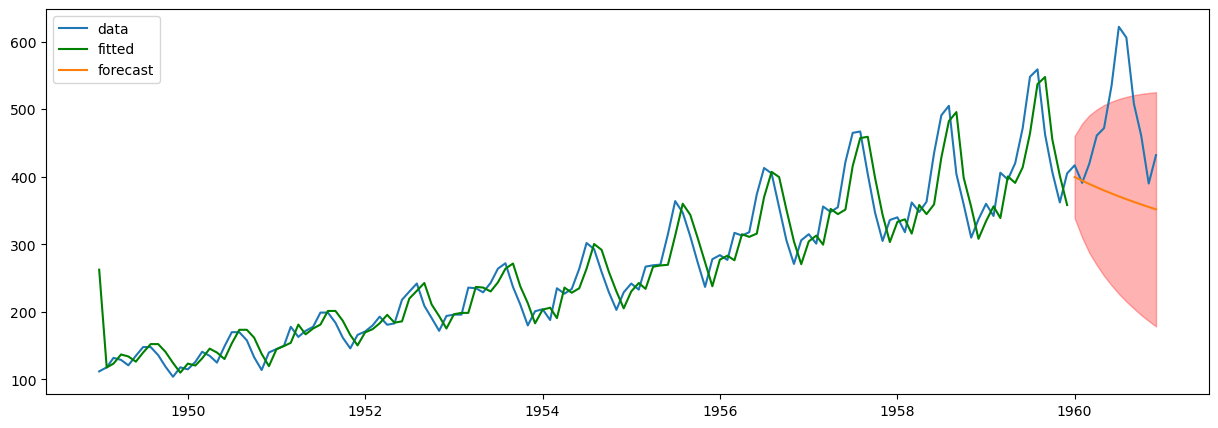

In [20]:
plot_fit_and_forecast(arima_result)

c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


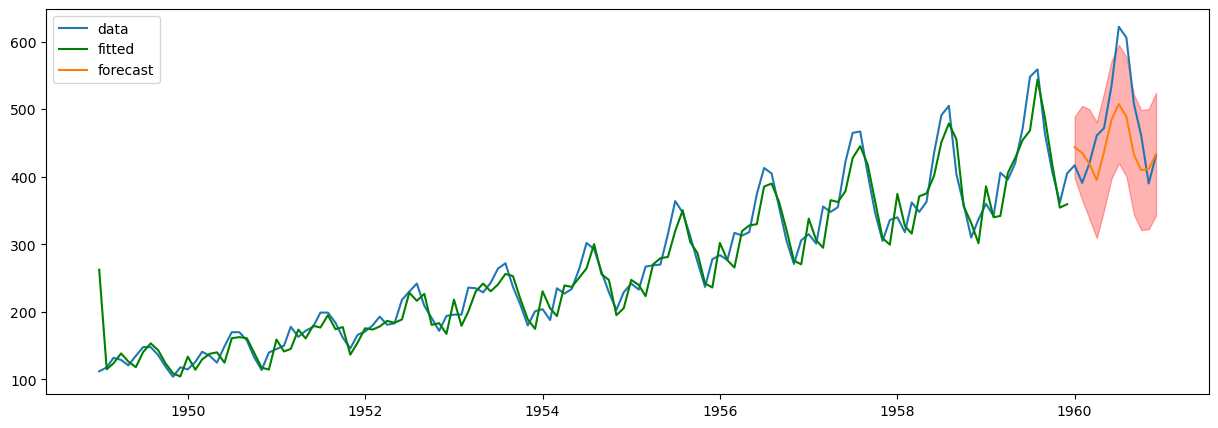

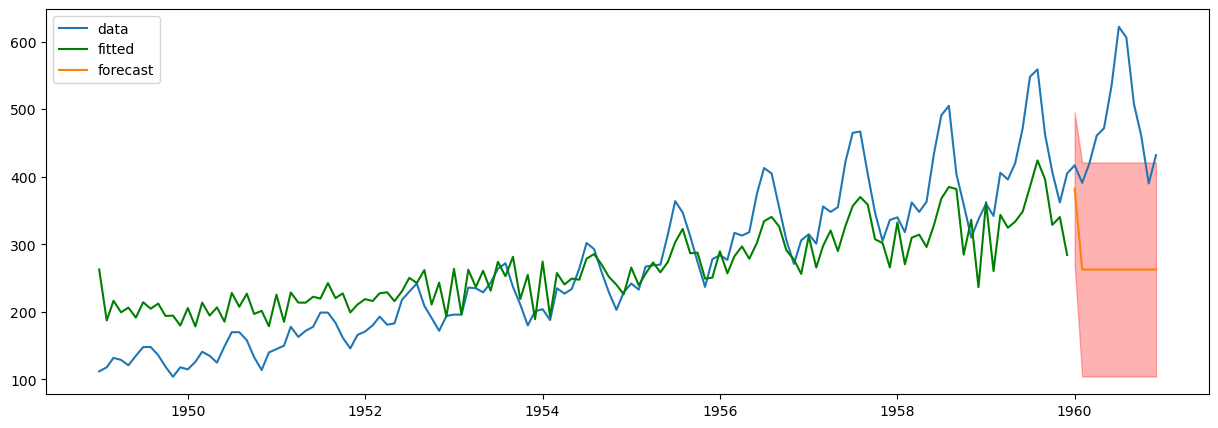

In [21]:
arima = ARIMA(train['Passengers'] , order=(10,0,0))  ## AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)


arima = ARIMA(train['Passengers'] , order=(0,0,1)) ## MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

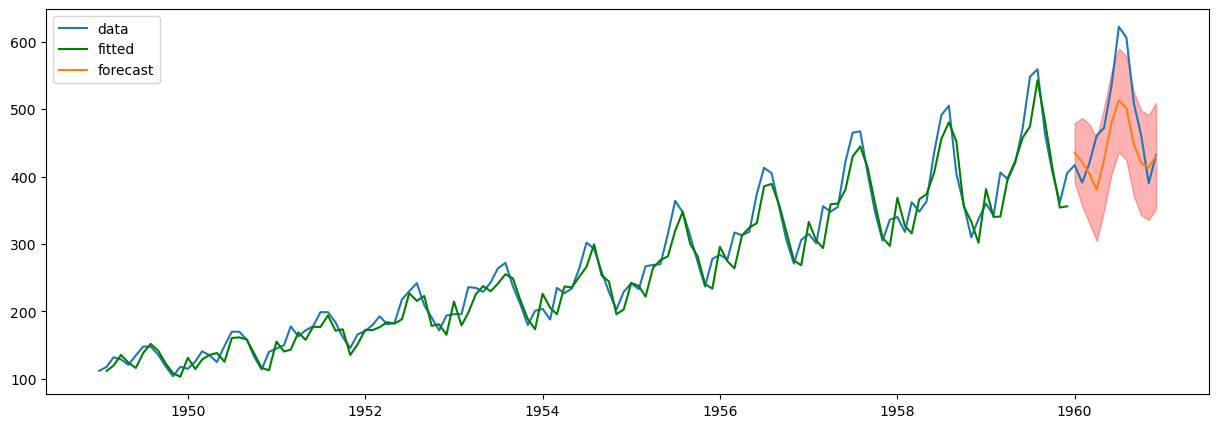

In [22]:
arima = ARIMA(train['Passengers'],order=(8,1,1))
arima_result_811 = arima.fit()

def plot_fit_and_forecast_int(result,d,col='Passengers'):
       fig,ax = plt.subplots(figsize=(15,5))
       ax.plot(df[col],label='data')


       ## plot the curve fitted on train set
       train_pred = result.predict(start=train.index[d],end=train.index[-1])


       ax.plot(train.index[d:],train_pred,color='green',label='fitted')

       ##### forecast the test set
       prediction_result = result.get_forecast(Ntest)
       conf_int = prediction_result.conf_int()
       lower , upper = conf_int[f'lower {col}'] , conf_int[f'upper {col}']
       forecast = prediction_result.predicted_mean
       ax.plot(test.index , forecast , label='forecast')
       ax.fill_between(test.index,lower , upper , color='red',alpha=0.3)
       ax.legend()


plot_fit_and_forecast_int(arima_result_811,1)

# Stationarity 

In [25]:
df = pd.read_csv('../Datasets/airline_passengers (5).csv',index_col='Month',parse_dates=True) 
adfuller(df['Passengers'])

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [26]:
def adf(x):
       res = adfuller(x)
       print('Test-Statistic :',res[0])
       print('P-value',res[1])
       if res[1] < 0.05:
              print("Stationarity")
       else:
              print("Non-Stationarity")

In [27]:
adf(df['Passengers'])

Test-Statistic : 0.8153688792060511
P-value 0.991880243437641
Non-Stationarity


In [29]:
df['Diff'] = df['Passengers'].diff()
adf(df['Diff'].dropna())

Test-Statistic : -2.8292668241699874
P-value 0.05421329028382711
Non-Stationarity


# ACF & PACF 

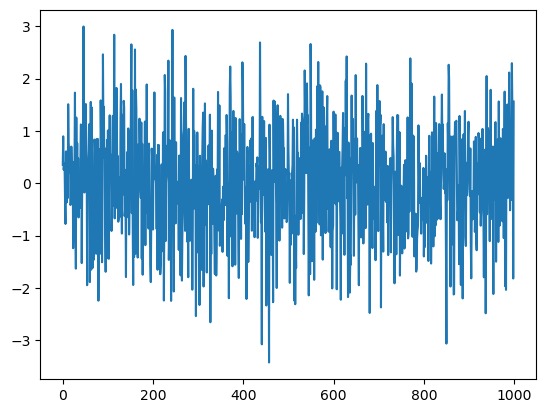

In [31]:
x0 = np.random.randn(1000)
plt.plot(x0)

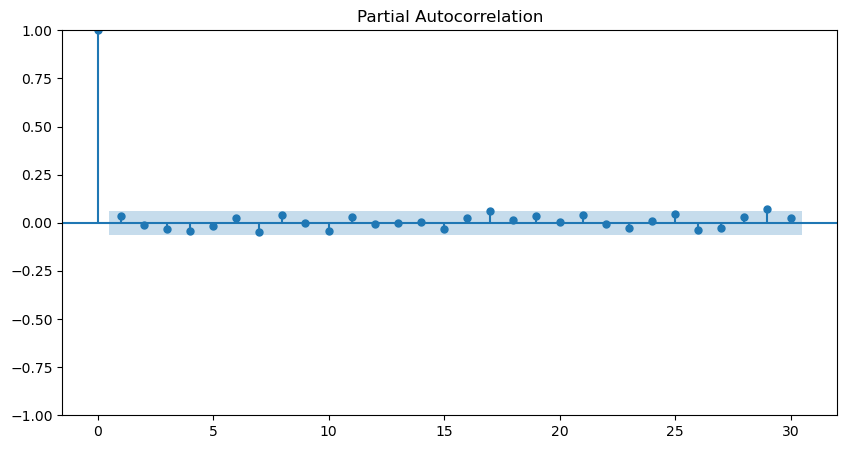

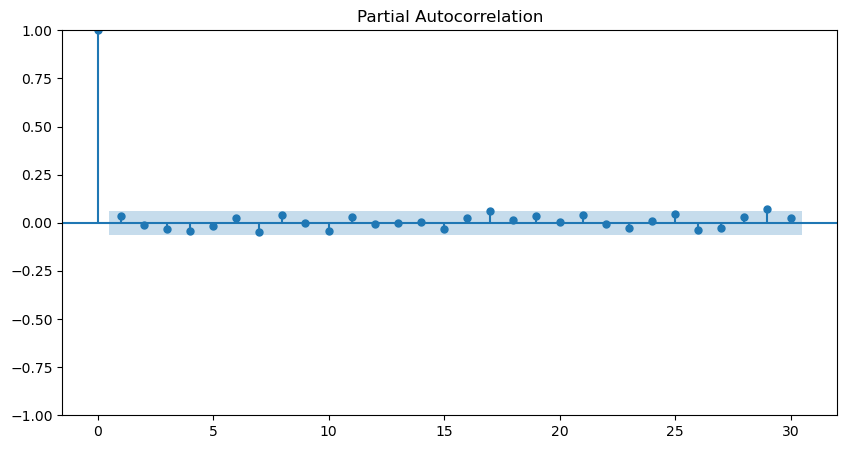

In [32]:
fig ,ax = plt.subplots(figsize=(10,5))
plot_pacf(x0,ax=ax)

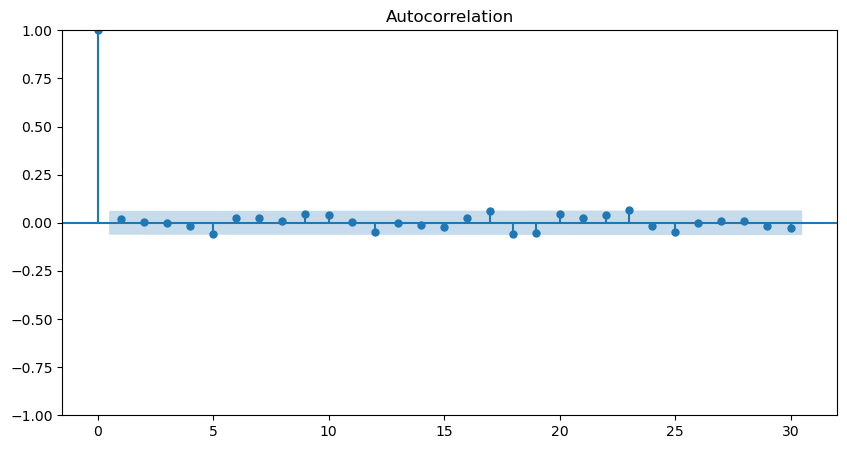

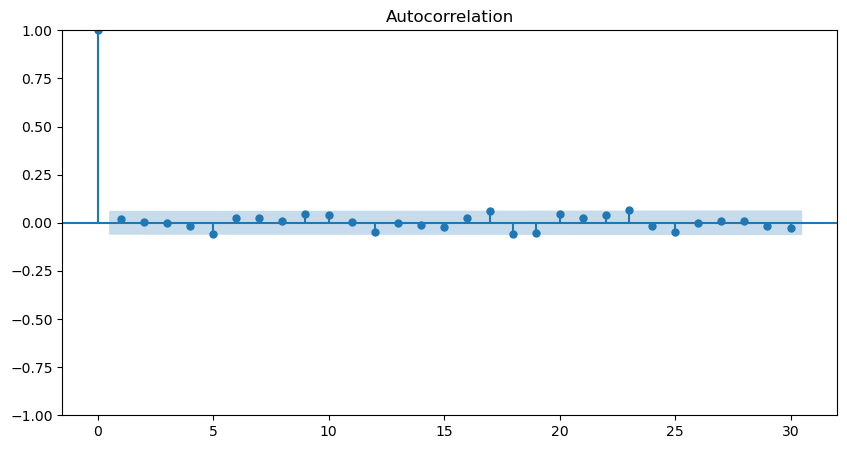

In [33]:
fig , ax = plt.subplots(figsize=(10,5))
plot_acf(np.random.randn(1000),ax=ax)

# Auto ARIMA 

In [ ]:
pip install pmdarima

In [5]:
import pmdarima as pm

In [6]:
df = pd.read_csv('../Datasets/airline_passengers (5).csv',index_col='Month',parse_dates=True) 
df['LogPassengers'] = np.log(df['Passengers'])

Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

model = pm.auto_arima(train['Passengers'],trace=True,suppress_warnings=True,seasonal=True,m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.26 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=0.67 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.26 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.21 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.38 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.11 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.27 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Tue, 14 May 2024   AIC                            905.686
Time:                                    16:37:25   BIC                            919.623
Sample:                                01-01-1949   HQIC                           911.346
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

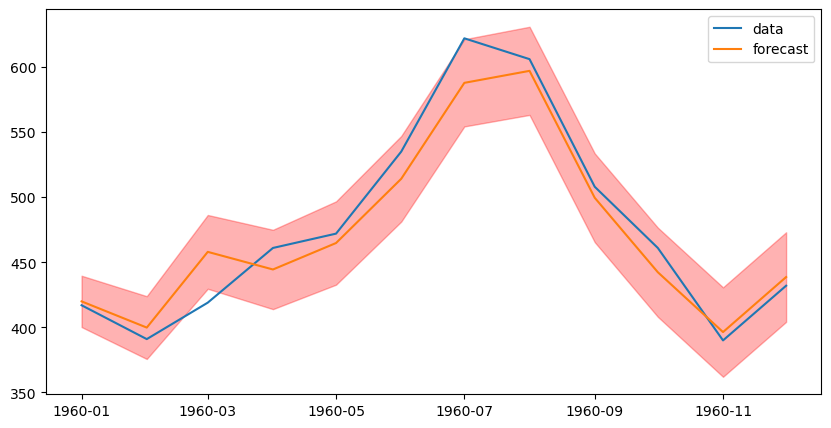

In [10]:
test_pred , confint = model.predict(n_periods=Ntest,return_conf_int=True)

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(test.index , test['Passengers'],label='data')
ax.plot(test.index , test_pred , label='forecast')
ax.fill_between(test.index , confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()




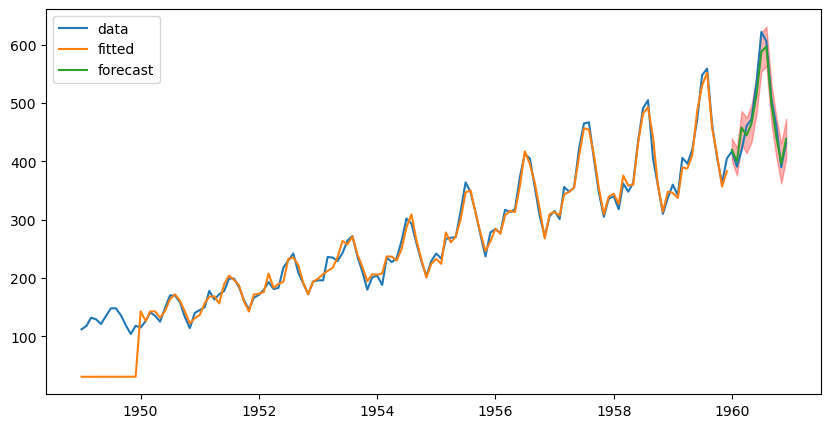

In [12]:
train_pred = model.predict_in_sample(start=0,end=-1)


fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df.index,df['Passengers'],label='data')
ax.plot(train.index, train_pred , label='fitted')
ax.plot(test.index , test_pred , label='forecast')
ax.fill_between(test.index,confint[:,0],confint[:,1],color='red',alpha=0.3)
ax.legend()


In [27]:
##############     non-seasonal     ###################

model = pm.auto_arima(train['Passengers'],
                     trace=True,
                     suppress_warnings=True,
                     max_p=12 , max_q=2,max_order=14,
                     stepwise=True,
                     seasonal=False

)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1076.668, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1069.465, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1064.620, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1076.492, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1058.773, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1061.147, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1066.293, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1058.133, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1063.645, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1068.537, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1059.247, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1058.1

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:               SARIMAX(4, 1, 2)   Log Likelihood                -519.366
Date:                Tue, 14 May 2024   AIC                           1052.732
Time:                        17:27:33   BIC                           1071.885
Sample:                             0   HQIC                          1060.505
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2302      0.137      1.677      0.093      -0.039       0.499
ar.L2          0.3910      0.132      2.962      0.003       0.132       0.650
ar.L3         -0.2039      0.100     -2.038      0.042      -0.400      -0.008
ar.L4         -0.1884      0.133     -1.419      0.156      -0.448       0.072
ma.L1          0.1137      0.124      0.917      0.359      -0.129       0.357
ma.L2         -0.7462      0.135     -5.512      0.000      -1.012      -0.481
sigma2       523.3408     89.376      5.855      0.000     348.166     698.515
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 5.41
Prob(Q):                              0.50   Prob(JB):                         0.07
Heteroskedasticity (H):               4.97   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMA 

In [17]:
# Import packages
import plotly.express as px
import pandas as pd

# Read in the data
data=pd.read_csv('../Datasets/airline_passengers (5).csv')
data['Month'] = pd.to_datetime(data['Month'])


def plot_passenger_volumes(df: pd.DataFrame,
                           y: str) -> None:
    """General function to plot the passenger data."""

    fig = px.line(df, x='Month', y=y, labels={'Month': 'Date'})
    fig.update_layout(template="simple_white", font=dict(size=18), title_text='Airline Passengers',
                      width=650, title_x=0.5, height=400)

    return fig.show()


# Plot the airline passenger data
plot_passenger_volumes(df=data, y='Passengers')

In [21]:
#####################  # Import packages ############################ 


from scipy.stats import boxcox

# Make the data stationary
data['Passengers_Boxcox'], lam = boxcox(data['Passengers'])
data["Passenger_diff"] = data["Passengers_Boxcox"].diff()
data.dropna(inplace=True)

# Plot the stationary passenger data
plot_passenger_volumes(df=data, y='Passenger_diff')

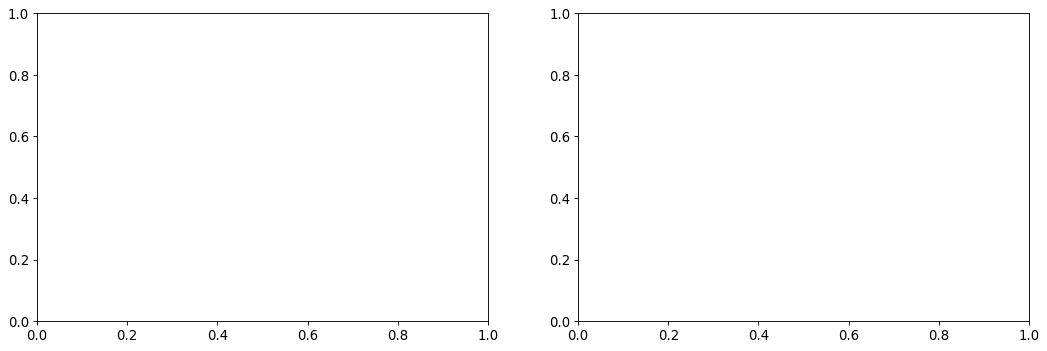

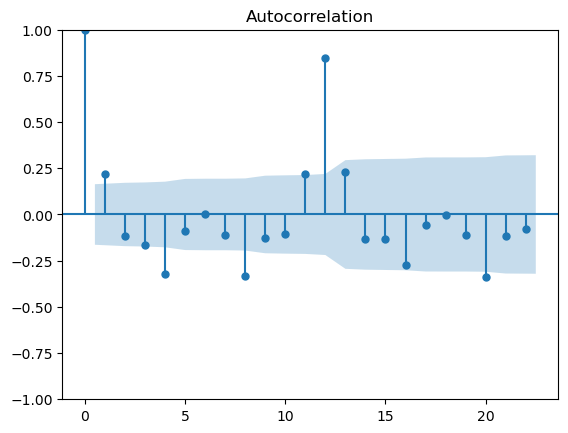

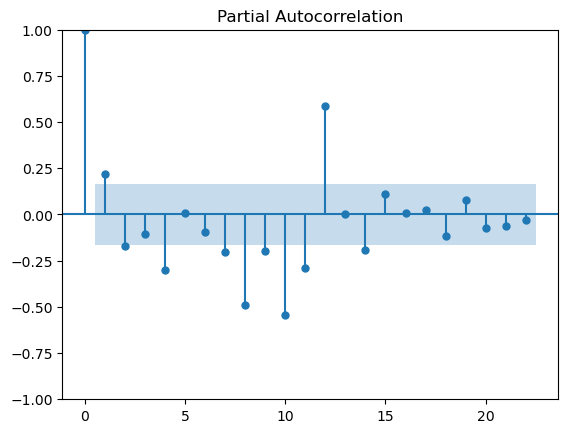

In [22]:
##########################    Modelling ############################# 
# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Plot acf and pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(data['Passenger_diff'])
plot_pacf(data['Passenger_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [ ]:
'''
We already observed that our series yearly seasonality, m=12, but the above plots confirm this as we have large spikes at the 12th lags. The lags are also significant to around ~10th lag for both plots. Overall this indicates that a SARIMA(10, 1, 10)(1, 1, 1)12 model should be suitable.

Now, let’s fit the model using the ARIMA class from statsmodels and generate the forecasts. Luckily, this class carries out differencing for us, so we only need to pass the Box-Cox transformed time series:


'''

In [23]:
# Import packages
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA

# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

# Build ARIMA model
model = ARIMA(train['Passengers_Boxcox'], order=(10, 1, 10),
              seasonal_order=(1, 1, 1, 12)).fit()
boxcox_forecasts = model.forecast(len(test))
forecasts = inv_boxcox(boxcox_forecasts, lam)

c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

c:\Users\Tharindu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported

In [25]:
######## Results ############# 

# Import packages
import plotly.graph_objects as go

def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Month'], y=train['Passengers'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Month'], y=test['Passengers'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Month'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Passengers')

    return fig.show()


# Plot the forecasts
plot_forecasts(forecasts, 'SARIMA')

# ARIMAX & SARIMAX 

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [ ]:
sarimax_model = SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,4),exog=df['var1'])


#### Get the results 
res = sarimax_model(disp=False)